In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [0]:
#Dropping product category 2 and 3 because it contain too much nan value to be consider
data = data.drop(['Product_Category_2', 'Product_Category_3'], axis = 1)

In [8]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


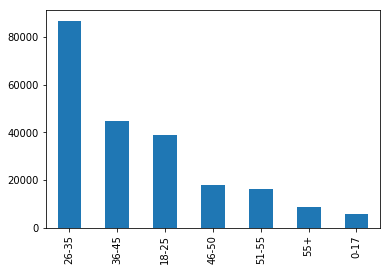

In [9]:
data['Age'].where(data['Purchase'] > 9200).value_counts().plot.bar()


conclusion : 
People between the age of 26-35 shop more on black friday sale.

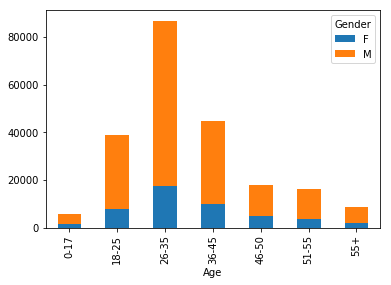

In [10]:
pd.crosstab(data['Age'].where(data['Purchase'] > 9200), data['Gender']).plot.bar(stacked = True)

conclusion: Men do more shopping on black friday sale than women

In [11]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

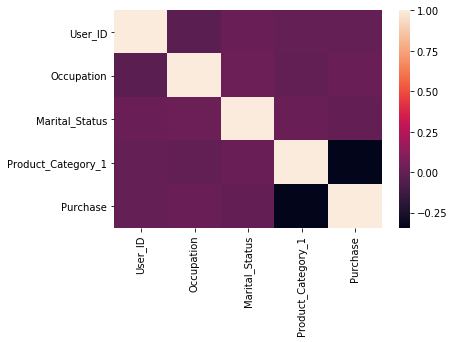

In [12]:
sns.heatmap(data.corr())

In [0]:
data = data.drop(['Occupation'], axis = 1) #dropping because occupation is masked so it won't be much use.

In [0]:
#Taking Necessary Features
X = data.iloc[:, 2:8].values
y = data.iloc[:, -1].values

In [15]:
X.shape

(550068, 6)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label1 = LabelEncoder()
X[:, 0] = label1.fit_transform(X[:, 0])

label2 = LabelEncoder()
X[:, 1] = label2.fit_transform(X[:, 1])

label3 = LabelEncoder()
X[:, 2] = label3.fit_transform(X[:, 2])

label4 = LabelEncoder()
X[:, 3] = label4.fit_transform(X[:, 3])

label5 = LabelEncoder()
X[:, 5] = label5.fit_transform(X[:, 5])

In [17]:
X

array([[0, 0, 0, 2, 0, 2],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 11],
       ...,
       [0, 2, 1, 4, 1, 19],
       [0, 6, 2, 2, 0, 19],
       [0, 4, 1, 4, 1, 19]], dtype=object)

In [18]:
#Removing 1st column to avoid dummy variable trap.
onehot = OneHotEncoder(categorical_features = [1])
X = onehot.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
onehot1 = OneHotEncoder(categorical_features = [2])
X = onehot1.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [20]:
onehot1 = OneHotEncoder(categorical_features = [3])
X = onehot1.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [21]:
onehot1 = OneHotEncoder(categorical_features = [5])
X = onehot1.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 150, learning_rate = 0.03, min_samples_leaf = 8, max_depth = 10)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [26]:
print(mse)

9069514.047656467


In [27]:
np.sqrt(mse)

3011.5633892808014

In [0]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler(feature_range = (0, 1))
y_t = msc.fit_transform(y_test.reshape([-1, 1]))
y_p = msc.transform(y_pred.reshape([-1, 1]))

In [0]:
x_ = np.random.uniform(0, 1, len(y_test))

In [48]:
len(x_)

110014

In [0]:
x_ = np.sort(x_)

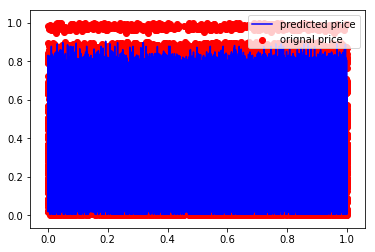

In [55]:
#visualizing predicted and orignal
plt.scatter(x_,y_t, color = 'red', label = 'orignal price')
plt.plot(x_, y_p, color = 'blue', label = 'predicted price')
plt.legend()
plt.show()